In [1]:
import os
#os.chdir("/Users/juanporras/Desktop/NLP_AMSE")
os.chdir("/Users/juanporras/NLP_AMSE")
import numpy as np
import sympy as sym
import sys
import pandas as pd
import re
import time
import itertools
import collections
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda
import pickle 

import ast
import geopandas

import contextily as ctx
import urllib.request
from urllib.request import urlopen
import json

from emojis_lexicon import *
from liwc_analysis_es import *
import urllib.request
from urllib.request import urlopen
import json

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/html5lib/_trie/_base.py:3: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



1 Char
2 Image[twemoji]
3 Unicodecodepoint
4 Occurrences[5...max]
5 Position[0...1]
6 Neg[0...1]
7 Neut[0...1]
8 Pos[0...1]
9 Sentiment score[-1...+1]
10 Sentiment bar(c.i. 95%)
11 Unicode name
12 Unicode block


# Appends all datasets

In [2]:
directory = os.chdir("/Users/juanporras/NLP_AMSE/Data")
df = pd.read_csv(os.listdir(directory)[0], sep=",", encoding="utf_16")
for file in os.listdir(directory)[1:7]:
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        #print('File found:', filename)
        data = pd.read_csv(filename , sep=",", encoding="utf_16")
        df = df.append(data)

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df = df[df['lan']=='es']
df

In [5]:
users = pd.read_csv('/Users/juanporras/NLP_AMSE/Sources/es_10-2019_users_spanish_tw_places_location_sample.csv', sep=",")
users = users.rename(columns={"id": "user_id"})
users

user_id                                      lang_tweet  \
0             1249530546                                       {'es': 1}   
1              786790280  {'es': 2, 'und': 3, 'ja': 1, 'en': 4, 'tr': 1}   
2              250340655                                       {'es': 1}   
3              545591170                                       {'es': 1}   
4               12189162                              {'es': 1, 'en': 1}   
...                  ...                                             ...   
4995  916964488615727104                                       {'es': 1}   
4996          2722841607                                       {'es': 2}   
4997           313428221                                       {'es': 1}   
4998  822095471262961664                                       {'es': 2}   
4999          1476802856                            {'es': 11, 'und': 1}   

     geolocation_tweet     lang_description   lang_location_user  \
0                   {}  {'es': 98, 'un': 0}            {'un': 0}   
1                   {}                   {}         {'ca': 1045}   
2                   {}                   {}            {'un': 0}   
3                   {}            {'un': 0}            {'un': 0}   
4                   {}          {'en': 198}          {'ca': 188}   
...                ...                  ...                  ...   
4995                {}  {'es': 98, 'un': 0}  {'es': 93, 'un': 0}   
4996                {}          {'es': 194}          {'es': 174}   
4997                {}            {'un': 0}            {'un': 0}   
4998                {}          {'es': 196}          {'gl': 188}   
4999                {}         {'es': 1188}         {'es': 1044}   

                    places_location     sa_tweet     sa_descr  
0                  {'barcelona': 1}   {False: 1}   {False: 1}  
1                    {'espana': 11}  {False: 11}  {False: 11}  
2                     {'madrid': 1}   {False: 1}   {False: 1}  
3       {'sevilla': 1, 'espana': 1}   {False: 1}   {False: 1}  
4     {'barcelona': 2, 'espana': 2}   {False: 2}   {False: 2}  
...                             ...          ...          ...  
4995     {'burgos': 1, 'espana': 1}   {False: 1}   {False: 1}  
4996                  {'espana': 2}   {False: 2}   {False: 2}  
4997                    {'rios': 1}   {False: 1}   {False: 1}  
4998   {'jorquera': 2, 'espana': 2}   {False: 2}   {False: 2}  
4999                 {'espana': 12}  {False: 12}  {False: 12}  

[5000 rows x 8 columns]

In [6]:
df = df.merge(users[['user_id','places_location']], on=['user_id'])
df

Unnamed: 0             tweet_id     user_id  \
0                 1  1281149926416822272  1249530546   
1                 4  1256632008945565701  1249530546   
2                 5  1256631891471499264  1249530546   
3                 7  1240242268503773187  1249530546   
4                 8  1238799090667991041  1249530546   
...             ...                  ...         ...   
4136426      998055  1201356418558902272   251137978   
4136427      998056  1201170922713026560   251137978   
4136428      998057  1201170750402637825   251137978   
4136429      998058  1201170105335525382   251137978   
4136430      998059  1201091193855266816   251137978   

                                                                                                                                               text  \
0                                                                                           "@elsmatins @tv3cat @Afrucat En plató sense mascareta?"   
1                                                                                      "@Ana40529163 @mundodeportivo Y la prueba de que es robada?"   
2                                                                                   "@nikardenas @mundodeportivo Pruebas de que la foto es robada?"   
3                                                                  "Está el rey acojonado por la cacerolada. Ahora está haciendo la transferencia."   
4                                                                                             "@Gusx1 Gilipollas haciendo gilipolleces. Nada nuevo"   
...                                                                                                                                             ...   
4136426                                    "RT @pablxrtega: Os habéis parado a pensar con quién empezasteis el año y con quién lo vais a acabar..."   
4136427                                                "RT @lgtbitch: este video sigue siendo la cosa mas tierna del mundo https://t.co/udDDTrenNA"   
4136428                                                       "RT @12martarubio: Lo quiero hacer con mi grupo de amigas YA https://t.co/BUVFx7RFOm"   
4136429                                     "RT @ArianaaRosaa: Si el papá de mis hijos no es así con ellos, no quiero nada https://t.co/XtfCwyj2Ev"   
4136430  "RT @Flor_Esteche: Llegue a una edad en la que disfruto tanto mi soledad que si te digo para hacer algo es porque de verdad te quiero ver"   

               date lan geolocalisation_tweet hashtag  \
0        1594284919  es                   NaN     NaN   
1        1588439392  es                   NaN     NaN   
2        1588439364  es                   NaN     NaN   
3        1584531774  es                   NaN     NaN   
4        1584187693  es                   NaN     NaN   
...             ...  ..                   ...     ...   
4136426  1575260664  es                   NaN     NaN   
4136427  1575216439  es                   NaN     NaN   
4136428  1575216398  es                   NaN     NaN   
4136429  1575216244  es                   NaN     NaN   
4136430  1575197430  es                   NaN     NaN   

                                                           website  \
0                                                              NaN   
1                                                              NaN   
2                                                              NaN   
3                                                              NaN   
4                                                              NaN   
...                                                            ...   
4136426                                                        NaN   
4136427                                                        NaN   
4136428  https://twitter.com/niknuraain/status/1200399095908556801   
4136429      https://twitter.com/GYGYVS/status/1200160885739794434   
4136430                                                        NaN  

In [7]:
df.shape

(4136431, 93)

In [8]:
df.columns

Index(['Unnamed: 0', 'tweet_id', 'user_id', 'text', 'date', 'lan',
       'geolocalisation_tweet', 'hashtag', 'website', 'retweet', 'text_clean',
       'wordcount_text', 'nb_Pasado', 'word_Pasado', 'cat_Pasado',
       'nb_Present', 'word_Present', 'cat_Present', 'nb_Futuro', 'word_Futuro',
       'cat_Futuro', 'nb_Negacio', 'word_Negacio', 'cat_Negacio', 'nb_Social',
       'word_Social', 'cat_Social', 'nb_Familia', 'word_Familia',
       'cat_Familia', 'nb_Amigos', 'word_Amigos', 'cat_Amigos', 'nb_Humanos',
       'word_Humanos', 'cat_Humanos', 'nb_Afect', 'word_Afect', 'cat_Afect',
       'nb_EmoPos', 'word_EmoPos', 'cat_EmoPos', 'nb_EmoNeg', 'word_EmoNeg',
       'cat_EmoNeg', 'nb_Ansiedad', 'word_Ansiedad', 'cat_Ansiedad',
       'nb_Enfado', 'word_Enfado', 'cat_Enfado', 'nb_Triste', 'word_Triste',
       'cat_Triste', 'nb_Cuerpo', 'word_Cuerpo', 'cat_Cuerpo', 'nb_Salud',
       'word_Salud', 'cat_Salud', 'nb_Sexual', 'word_Sexual', 'cat_Sexual',
       'nb_Espacio', 'word_Espaci

In [9]:
df['places_location'].unique()

array(["{'barcelona': 1}", "{'espana': 11}", "{'madrid': 1}",
       "{'sevilla': 1, 'espana': 1}", "{'barcelona': 2, 'espana': 2}",
       "{'valencia': 5}", "{'cadiz': 2, 'espana': 2}",
       "{'valencia': 1, 'espana': 1}", "{'sevilla': 2, 'espana': 2}",
       "{'ceuti': 1}", "{'oviedo': 1}", "{'vigo': 2, 'espana': 2}",
       "{'madrid': 1, 'espana': 1}", "{'barcelona': 1, 'espana': 1}",
       "{'espana': 3}", "{'espana': 1}", "{'madrid': 3}", "{'espana': 4}",
       "{'madrid': 13}", "{'teruel': 1, 'espana': 1}", "{'navia': 3}",
       "{'salamanca': 1}", "{'espana': 2}", "{'granada': 1, 'espana': 1}",
       "{'espana': 5}", "{'valencia': 2, 'espana': 2}",
       "{'caceres': 1, 'espana': 1}", "{'barcelona': 2}",
       "{'leganes': 1}", "{'norte': 9, 'santander': 9}",
       "{'honrubia': 1, 'espana': 1}", "{'zamora': 2, 'espana': 2}",
       "{'arahal': 1}", "{'blanca': 1}", "{'segovia': 3, 'espana': 3}",
       "{'guimar': 2, 'espana': 2}", "{'valencia': 1}",
       "{'brihu

In [10]:
len(df)

4136431

# Sample

In [11]:
#Sentiments
df['Positivo'] = np.where(df['nb_EmoPos']>0, 1 , 0)
df['Negativo'] = np.where(df['nb_EmoNeg']>0, 1 , 0)
df['Ansioso'] = np.where(df['nb_Ansiedad']>0, 1 , 0)
df['Enfadado'] = np.where(df['nb_Enfado']>0, 1 , 0)
df['Triste'] = np.where(df['nb_Triste']>0, 1 , 0)

#Relative measures

#Sentiments
df['% Positivo'] = df['nb_EmoPos']/df['wordcount_text']
df['% Negativo'] = df['nb_EmoNeg']/df['wordcount_text']
df['% Ansiedad'] = df['nb_Ansiedad']/df['wordcount_text']
df['% Enfado'] = df['nb_Enfado']/df['wordcount_text']
df['% Triste'] = df['nb_Triste']/df['wordcount_text']

In [12]:
#others
df['% Pasado'] = df['nb_Pasado']/df['wordcount_text']
df['% Present'] = df['nb_Present']/df['wordcount_text']
df['% Futuro'] = df['nb_Futuro']/df['wordcount_text']
df['% Social'] = df['nb_Social']/df['wordcount_text']
df['% Familia'] = df['nb_Familia']/df['wordcount_text']
df['% Amigos'] = df['nb_Amigos']/df['wordcount_text']
df['% Humanos'] = df['nb_Humanos']/df['wordcount_text']
df['% Cuerpo'] = df['nb_Cuerpo']/df['wordcount_text']
df['% Salud'] = df['nb_Salud']/df['wordcount_text']
df['% Sexual'] = df['nb_Sexual']/df['wordcount_text']
df['% Espacio'] = df['nb_Espacio']/df['wordcount_text']
df['% Tiempo'] = df['nb_Tiempo']/df['wordcount_text']
df['% Trabajo'] = df['nb_Trabajo']/df['wordcount_text']
df['% Logro'] = df['nb_Logro']/df['wordcount_text']
df['% Placer'] = df['nb_Placer']/df['wordcount_text']
df['% Hogar'] = df['nb_Hogar']/df['wordcount_text']
df['% Dinero'] = df['nb_Dinero']/df['wordcount_text']
df['% Religion'] = df['nb_Relig']/df['wordcount_text']
df['% Muerte'] = df['nb_Muerte']/df['wordcount_text']

In [13]:
print('Number of users:',len(list(df['user_id'].unique())))
print('Number of tweets:',len(list(df['tweet_id'].unique())))
print('Number of positive tweets:',(df['Positivo'].sum()))
print('Number of negative tweets:',(df['Negativo'].sum()))
print('Number of anxious tweets:',(df['Ansioso'].sum()))
print('Number of angry tweets:',(df['Enfadado'].sum()))
print('Number of sad tweets:',(df['Triste'].sum()))

Number of users: 3618
Number of tweets: 4136431
Number of positive tweets: 1335437
Number of negative tweets: 933350
Number of anxious tweets: 151620
Number of angry tweets: 494046
Number of sad tweets: 210412


In [14]:
stats = {'Positive':[(df['Positivo'].sum())],
         'Negative':[(df['Negativo'].sum())],
         'Anxiety':[(df['Ansioso'].sum())],
         'Anger':[(df['Enfadado'].sum())],
         'Sadness':[(df['Triste'].sum())]
        }
stats = pd.DataFrame (stats, columns = ['Positive','Negative','Anxiety','Anger','Sadness'])
stats = stats.transpose()
stats = stats.rename(columns={0:'Tweets'})
stats['Share'] = stats['Tweets']/ len(df)
stats

Tweets     Share
Positive  1335437  0.322848
Negative   933350  0.225641
Anxiety    151620  0.036655
Anger      494046  0.119438
Sadness    210412  0.050868

In [15]:
df['date'] = pd.to_datetime(df['date'], unit ='s')
print(df['date'].min())
print(df['date'].max())

2019-12-01 00:00:14
2020-08-06 02:16:32


In [16]:
def manipulating_dates(data):
    day = []
    for line in df['date']:
        s = line.strftime('%Y-%m-%d')
        day.append(s)
    df['day'] = day
    week =[]
    for line in df['day']:
        s = datetime.strptime(line, '%Y-%m-%d')
        week.append(s.strftime("%U"))
    df['week'] = week
    WN = []
    for line in df['week']:
        num = int(line) + 1 #COMMEN
        WN.append(num)
    df['week'] = WN

In [17]:
manipulating_dates(df)

In [18]:
print(df['day'].min())
print(df['day'].max())
df = df.sort_values(by='date')
df_2020 = df[(df['day']>='2020-01-01') & (df['day']<='2020-08-01')]
df_2019 = df[(df['day']>='2019-01-01') & (df['day']<='2019-12-31')]

2019-12-01
2020-08-06


In [19]:
df

Unnamed: 0             tweet_id              user_id  \
417755       520492  1200927550488211458            982725626   
969904       191592  1200927561540395010  1037276519679315968   
3270521       73430  1200927596080508928           2252082560   
1696226       87349  1200927632684146688           1479597504   
3378003       53718  1200927781795893248            129558032   
...             ...                  ...                  ...   
2371809      935571  1291191692377415680            369181049   
2371808      935570  1291192069353021443            369181049   
3283401       89351  1291194679262879745            437966759   
2406864      982546  1291195154016206848   708788462753865728   
3283400       89350  1291196428925239300            437966759   

                                                                                                                                                          text  \
417755                                                                                                            "@JUANCHO61199 jo pues en enero (pásalo bn)"   
969904          "RT @Merchee94: Ya me jodería que un amigo o amiga sintiera que no puede desahogarse conmigo porque ya me ha contado el mismo problema varia…"   
3270521                                                                          "Oye @oscarmartinezdj Feliz cumpleaños, que pases un dia genial en tu tierra"   
1696226                                                            "Fabrico y reparo cualquier máquina o pieza mecánica! 0414-1421049 https://t.co/HqgluJhTzM"   
3378003  "RT @RafaelCabaliere: 29 de noviembre.\n\nHay personas que nos cosen,\nque son salvavidas,\ncon las que todo está bien\ncuando están cerca.\n\nEs b…"   
...                                                                                                                                                        ...   
2371809                                                                                              "RT @ketacho: te haría papas fritas a las 3 de la mañana"   
2371808                                                                                                                      "Se me atragantan algunas noches"   
3283401                                                       "Me dió una reacción alérgica y mi brazo parece el de un monstruo jajajaja dios te odio alergia"   
2406864                                                                                                        "Ren cambia mas de opinion que de calzoncillos"   
3283400         "RT @ponto_esteban: 1. @horadado me hizo llegar a esto. Como dice @ppryluka, es difícil rebatir con evidencia y argumentos posiciones que no…"   

                       date lan geolocalisation_tweet hashtag website  \
417755  2019-12-01 00:00:14  es                   NaN     NaN     NaN   
969904  2019-12-01 00:00:17  es                   NaN     NaN     NaN   
3270521 2019-12-01 00:00:25  es                   NaN     NaN     NaN   
1696226 2019-12-01 00:00:34  es                   NaN     NaN     NaN   
3378003 2019-12-01 00:01:09  es                   NaN     NaN     NaN   
...                     ...  ..                   ...     ...     ...   
2371809 2020-08-06 01:57:43  es                   NaN     NaN     NaN   
2371808 2020-08-06 01:59:13  es                   NaN     NaN     NaN   
3283401 2020-08-06 02:09:35  es                   NaN     NaN     NaN   
2406864 2020-08-06 02:11:28  es                   NaN     NaN     NaN   
3283400 2020-08-06 02:16:32  es                   NaN     NaN     NaN   

              retweet  \
417755            NaN   
969904   1.200402e+18   
3270521           NaN   
1696226           NaN   
3378003  1.200394e+18   
...               ...   
2371809  1.290830e+18   
2371808           NaN   
3283401           NaN   
2406864           NaN   
3283400  1.291097e+18   

                                                                                                         

# Tweet's evolution

In [20]:
fig = px.line(pd.DataFrame(df_2020.groupby(['day'])['count'].sum()).reset_index()
                  , x="day", y="count", color_discrete_sequence=['Green'])
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-10', x1= '2020-05-10',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
fig.update_layout(
    title_text="Daily Tweets (2020)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
#fig.update_layout(yaxis_type="log")
fig.show()

In [21]:
df_ma = df_2020.groupby(['day'])['polarity','% Positivo','% Negativo','% Ansiedad','% Enfado','% Triste',
                                '% Pasado','% Present', '% Futuro','% Social', '% Familia', '% Amigos',
                                 '% Humanos','% Cuerpo','% Salud','% Sexual', '% Espacio', '% Tiempo',
                                 '% Trabajo','% Logro', '% Placer', '% Hogar', '% Dinero',
                                 '% Religion', '% Muerte'].mean().reset_index()
df_ma

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



day  polarity  % Positivo  % Negativo  % Ansiedad  % Enfado  \
0    2020-01-01  0.005456    0.046485    0.019779    0.002343  0.009949   
1    2020-01-02  0.003925    0.036241    0.018423    0.002446  0.008999   
2    2020-01-03  0.003317    0.033331    0.022525    0.003220  0.011003   
3    2020-01-04  0.002764    0.033962    0.022084    0.003078  0.010964   
4    2020-01-05  0.003486    0.033313    0.021529    0.002728  0.011217   
..          ...       ...         ...         ...         ...       ...   
209  2020-07-28  0.005292    0.037279    0.019284    0.002541  0.008773   
210  2020-07-29  0.005740    0.037946    0.019401    0.002428  0.009240   
211  2020-07-30  0.004148    0.035910    0.020536    0.002632  0.009733   
212  2020-07-31  0.005418    0.038020    0.019804    0.002561  0.010204   
213  2020-08-01  0.005080    0.038076    0.019527    0.002756  0.009279   

     % Triste  % Pasado  % Present  % Futuro  % Social  % Familia  % Amigos  \
0    0.004091  0.013576   0.102591  0.001215  0.088908   0.005821  0.004674   
1    0.003814  0.012328   0.103925  0.001192  0.087136   0.004509  0.004087   
2    0.004490  0.010975   0.104485  0.001618  0.086621   0.004188  0.004079   
3    0.004570  0.011022   0.105504  0.001237  0.090323   0.003843  0.004003   
4    0.004203  0.010954   0.104128  0.001290  0.091988   0.004492  0.003636   
..        ...       ...        ...       ...       ...        ...       ...   
209  0.003793  0.011365   0.101972  0.001230  0.089331   0.003719  0.004222   
210  0.003808  0.011174   0.098272  0.002005  0.085477   0.003119  0.003500   
211  0.003901  0.011906   0.101811  0.001980  0.087607   0.003607  0.003690   
212  0.004045  0.012185   0.101259  0.001348  0.084736   0.003505  0.003279   
213  0.003817  0.012120   0.099165  0.001507  0.087156   0.003845  0.003919   

     % Humanos  % Cuerpo   % Salud  % Sexual  % Espacio  % Tiempo  % Trabajo  \
0     0.007263  0.008312  0.005029  0.007945   0.032748  0.055378   0.021135   
1     0.006973  0.007739  0.003818  0.005968   0.033540  0.044807   0.022725   
2     0.006922  0.007310  0.004168  0.005321   0.036523  0.038737   0.021091   
3     0.006544  0.007557  0.003555  0.006054   0.036546  0.037413   0.019660   
4     0.009074  0.007508  0.003831  0.006566   0.037576  0.038060   0.021017   
..         ...       ...       ...       ...        ...       ...        ...   
209   0.007748  0.007106  0.004035  0.005576   0.038341  0.037142   0.021310   
210   0.006692  0.007107  0.003492  0.005132   0.036635  0.036323   0.021101   
211   0.006604  0.006781  0.004174  0.005093   0.037887  0.036752   0.021016   
212   0.006940  0.006925  0.004119  0.005920   0.037354  0.039180   0.022156   
213   0.007168  0.007928  0.003507  0.005545   0.039255  0.039407   0.019939   

      % Logro  % Placer   % Hogar  % Dinero  % Religion  % Muerte  
0    0.022354  0.010538  0.003886  0.006183    0.002690  0.002804  
1    0.023777  0.011990  0.003739  0.007219    0.003287  0.002215  
2    0.022118  0.010715  0.003776  0.007219    0.002858  0.004625  
3    0.022624  0.010582  0.003388  0.005842    0.002936  0.004296  
4    0.022476  0.010435  0.003566  0.006437    0.003830  0.003654  
..        ...       ...       ...       ...         ...       ...  
209  0.020471  0.011075  0.003753  0.006887    0.002671  0.003277  
210  0.020253  0.010949  0.003964  0.007450    0.002833  0.002965  
211  0.020002  0.010957  0.003623  0.007613    0.002887  0.002960  
212  0.020593  0.010829  0.003512  0.007519    0.002897  0.003203  
213  0.019355  0.010772  0.003787  0.007456    0.002587  0.003342  

[214 rows x 26 columns]

In [22]:
group_cat_one = ['polarity','% Positivo','% Negativo','% Ansiedad','% Enfado','% Triste',
                                '% Pasado','% Present', '% Futuro','% Social', '% Familia', '% Amigos',
                                 '% Humanos','% Cuerpo','% Salud','% Sexual', '% Espacio', '% Tiempo',
                                 '% Trabajo','% Logro', '% Placer', '% Hogar', '% Dinero',
                                 '% Religion', '% Muerte']
for var in group_cat_one:
    mean = df_ma[var].rolling(window=7).mean()
    df_ma['ma'+ var] = mean

In [23]:
df_ma.head(10)

day  polarity  % Positivo  % Negativo  % Ansiedad  % Enfado  \
0  2020-01-01  0.005456    0.046485    0.019779    0.002343  0.009949   
1  2020-01-02  0.003925    0.036241    0.018423    0.002446  0.008999   
2  2020-01-03  0.003317    0.033331    0.022525    0.003220  0.011003   
3  2020-01-04  0.002764    0.033962    0.022084    0.003078  0.010964   
4  2020-01-05  0.003486    0.033313    0.021529    0.002728  0.011217   
5  2020-01-06  0.003579    0.035589    0.021474    0.002588  0.011341   
6  2020-01-07  0.003457    0.034478    0.020924    0.002469  0.010614   
7  2020-01-08  0.003850    0.034716    0.020208    0.002510  0.010713   
8  2020-01-09  0.002939    0.033371    0.020798    0.002657  0.010486   
9  2020-01-10  0.003677    0.034661    0.019750    0.002212  0.009605   

   % Triste  % Pasado  % Present  % Futuro  % Social  % Familia  % Amigos  \
0  0.004091  0.013576   0.102591  0.001215  0.088908   0.005821  0.004674   
1  0.003814  0.012328   0.103925  0.001192  0.087136   0.004509  0.004087   
2  0.004490  0.010975   0.104485  0.001618  0.086621   0.004188  0.004079   
3  0.004570  0.011022   0.105504  0.001237  0.090323   0.003843  0.004003   
4  0.004203  0.010954   0.104128  0.001290  0.091988   0.004492  0.003636   
5  0.004309  0.012649   0.107106  0.001205  0.089272   0.004819  0.003893   
6  0.004415  0.012869   0.103597  0.001231  0.086894   0.004153  0.003242   
7  0.003783  0.011606   0.103926  0.001601  0.086720   0.004742  0.003698   
8  0.004017  0.011202   0.106852  0.001936  0.085686   0.004115  0.003985   
9  0.004218  0.011809   0.102520  0.001413  0.087644   0.004325  0.004094   

   % Humanos  % Cuerpo   % Salud  % Sexual  % Espacio  % Tiempo  % Trabajo  \
0   0.007263  0.008312  0.005029  0.007945   0.032748  0.055378   0.021135   
1   0.006973  0.007739  0.003818  0.005968   0.033540  0.044807   0.022725   
2   0.006922  0.007310  0.004168  0.005321   0.036523  0.038737   0.021091   
3   0.006544  0.007557  0.003555  0.006054   0.036546  0.037413   0.019660   
4   0.009074  0.007508  0.003831  0.006566   0.037576  0.038060   0.021017   
5   0.007431  0.007673  0.003311  0.006065   0.034756  0.040525   0.019570   
6   0.006714  0.007677  0.003619  0.005723   0.035233  0.043559   0.023854   
7   0.006994  0.007825  0.003579  0.006493   0.037617  0.042429   0.025627   
8   0.006690  0.009119  0.003733  0.005290   0.036937  0.040722   0.023435   
9   0.007827  0.008914  0.004309  0.005831   0.037282  0.039773   0.025807   

    % Logro  % Placer   % Hogar  % Dinero  % Religion  % Muerte  mapolarity  \
0  0.022354  0.010538  0.003886  0.006183    0.002690  0.002804         NaN   
1  0.023777  0.011990  0.003739  0.007219    0.003287  0.002215         NaN   
2  0.022118  0.010715  0.003776  0.007219    0.002858  0.004625         NaN   
3  0.022624  0.010582  0.003388  0.005842    0.002936  0.004296         NaN   
4  0.022476  0.010435  0.003566  0.006437    0.003830  0.003654         NaN   
5  0.022877  0.010052  0.003631  0.006861    0.003615  0.003139         NaN   
6  0.023830  0.010635  0.003236  0.006703    0.004005  0.002804    0.003712   
7  0.023729  0.012631  0.003753  0.007265    0.003498  0.003510    0.003483   
8  0.023012  0.013718  0.004269  0.008003    0.003136  0.002826    0.003342   
9  0.022333  0.013639  0.004091  0.008214    0.003707  0.002981    0.003393   

   ma% Positivo  ma% Negativo  ma% Ansiedad  ma% Enfado  ma% Triste  \
0           NaN           NaN           NaN         NaN         NaN   
1           NaN           NaN           NaN         NaN         NaN   
2           NaN           NaN           NaN         NaN         NaN   
3           NaN           NaN           NaN         NaN         NaN   
4           NaN           NaN           NaN         NaN         NaN   
5           NaN           NaN           NaN         NaN         NaN   
6      0.036200      0.020963      0.002696    0.010584    0.004270   
7      0.034519      0.021024      0.002720    0.010693    0.

# Daily

In [24]:
Polarity = px.line(df_ma, x="day", y="polarity", color_discrete_sequence=['steelblue'])
Polarity.add_scatter(x=df_ma['day'], y=df_ma['mapolarity'], mode='lines', name='7-days MA',
                     marker_color='Orangered')
Polarity.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ),  
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
Polarity.update_layout(
    title_text="Daily Polarity Index (2020)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
Polarity.update_xaxes(title_text="")
Polarity.update_yaxes(title_text="")
Polarity.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#Polarity.update_layout(xaxis_rangeslider_visible=True)
Polarity.show()

# Sentiments

In [25]:
fig = px.line(df_ma, x="day", y="% Positivo", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Positivo'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Positive Emotion Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [26]:
fig = px.line(df_ma, x="day", y="% Negativo", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Negativo'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
fig.update_layout(
    title_text="Daily Negative Emotion Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [27]:
fig = px.line(df_ma, x="day", y="% Ansiedad", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Ansiedad'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
fig.update_layout(
    title_text="Daily Emotional Anxiety Related Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [28]:
fig = px.line(df_ma, x="day", y="% Enfado", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Enfado'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
fig.update_layout(
    title_text="Daily Emotional Angry Related Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [29]:
fig = px.line(df_ma, x="day", y="% Triste", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Triste'], mode='lines', name='7-days MA', marker_color='Orangered')
#fig = px.line(pd.DataFrame(df_2020.groupby(['day'])['% Triste'].mean()).reset_index(), x="day", y="% Triste", color_discrete_sequence=['steelblue'])
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
fig.update_layout(
    title_text="Daily Sad Emotion Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## OTHERS

In [30]:
fig = px.line(df_ma, x="day", y="% Pasado", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Pasado'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Past Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [31]:
fig = px.line(df_ma, x="day", y="% Present", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Present'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Present Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [32]:
fig = px.line(df_ma, x="day", y="% Futuro", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Futuro'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Futur Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [33]:
fig = px.line(df_ma, x="day", y="% Social", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Social'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Social Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [34]:
fig = px.line(df_ma, x="day", y="% Familia", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Familia'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Family Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [35]:
fig = px.line(df_ma, x="day", y="% Amigos", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Amigos'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Friends Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [36]:
fig = px.line(df_ma, x="day", y="% Humanos", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Humanos'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Human Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [37]:
fig = px.line(df_ma, x="day", y="% Cuerpo", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Cuerpo'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Body Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [38]:
fig = px.line(df_ma, x="day", y="% Salud", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Salud'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Health Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [39]:
fig = px.line(df_ma, x="day", y="% Sexual", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Sexual'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Sexual Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [40]:
fig = px.line(df_ma, x="day", y="% Espacio", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Espacio'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Space Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [41]:
fig = px.line(df_ma, x="day", y="% Tiempo", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Tiempo'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Time Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [42]:
fig = px.line(df_ma, x="day", y="% Trabajo", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Trabajo'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Work Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [43]:
fig = px.line(df_ma, x="day", y="% Logro", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Logro'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Achivement Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [44]:
fig = px.line(df_ma, x="day", y="% Placer", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Placer'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Pleasure Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [45]:
fig = px.line(df_ma, x="day", y="% Hogar", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Hogar'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Home Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [46]:
fig = px.line(df_ma, x="day", y="% Dinero", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Dinero'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Money Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [47]:
fig = px.line(df_ma, x="day", y="% Religion", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Religion'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Religion Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [48]:
fig = px.line(df_ma, x="day", y="% Muerte", color_discrete_sequence=['steelblue'])
fig.add_scatter(x=df_ma['day'], y=df_ma['ma% Muerte'], mode='lines', name='7-days MA', marker_color='Orangered')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-14', x1= '2020-03-14',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-05-11', x1= '2020-05-11',
        line=dict(
            color="Black",
            width=1,
            dash="dash")
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-06-21', x1= '2020-06-21',
        line=dict(
            color="Black",
            width=1,
            dash="dot")
    )  
])
#fig.add_trace(go.Scatter(x=df['week'],y=df['% Positivo'], mode="lines"))
fig.update_layout(
    title_text="Daily Death Words (% Total Words)",
    height=500,
    width=900,
    #template="presentation"
    template="simple_white"
)
# Themes
#['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 
# 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
# Configure axes
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.update_layout(xaxis=dict(range=['2020-01-01','2020-08-05']))
#Slider
#fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## MAPS

In [49]:
new_places_location = []
for row in df['places_location']:
    res = ast.literal_eval(row)
    dictlist = []
    for key, value in res.items():
        dictlist.append(key)
    new_places_location.append(dictlist)
new_places_location = [x[0] for x in new_places_location]
df['places_location'] = new_places_location

df['vague_location'] = (df['places_location'] == 'espana')
df['vague_location'].value_counts()
df['places_location'].value_counts()
df = df[df['vague_location']==False]

In [50]:
df_geoname = pd.read_csv('/Users/juanporras/NLP_AMSE/Sources/ES_places.csv', sep=",")                                                   # ATF
df_geoname = df_geoname.rename(columns={'name.1': 'name'})
df_geoname = df_geoname[['name', 'latitude', 'longitude', 'population']]
df = pd.merge(df, df_geoname, how='inner', left_on='places_location', right_on='name')
df['count'] = 1

df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

In [51]:
regions = geopandas.read_file("https://raw.githubusercontent.com/deldersveld/topojson/master/countries/spain/spain-province.json")
regions.info()
regions = regions[['NAME_1', 'geometry']]
regions['NAME_1'] = regions['NAME_1'].str.replace('é', 'e')
regions['NAME_1'] = regions['NAME_1'].str.replace('è', 'e')
regions['NAME_1'] = regions['NAME_1'].str.replace('ê', 'e')
regions['NAME_1'] = regions['NAME_1'].str.replace('ë', 'e')
regions['NAME_1'] = regions['NAME_1'].str.replace('à', 'a')
regions['NAME_1'] = regions['NAME_1'].str.replace('â', 'a')
regions['NAME_1'] = regions['NAME_1'].str.replace('ä', 'a')
regions['NAME_1'] = regions['NAME_1'].str.replace('û', 'u')
regions['NAME_1'] = regions['NAME_1'].str.replace('ü', 'u')
regions['NAME_1'] = regions['NAME_1'].str.replace('ù', 'u')
regions['NAME_1'] = regions['NAME_1'].str.replace('î', 'i')
regions['NAME_1'] = regions['NAME_1'].str.replace('ï', 'i')
regions['NAME_1'] = regions['NAME_1'].str.replace('ô', 'o')
regions['NAME_1'] = regions['NAME_1'].str.replace('ö', 'o')
regions['NAME_1'] = regions['NAME_1'].str.replace('ç', 'c')
regions['NAME_1'] = regions['NAME_1'].str.replace('ñ', 'n')
regions['NAME_1'] = regions['NAME_1'].str.replace('ó', 'o')
regions['NAME_1'] = regions['NAME_1'].str.replace('í', 'i')
regions['NAME_1'] = regions['NAME_1'].str.lower()
regions['NAME_1'] = regions['NAME_1'].astype(str).str.replace('[^\w\s]', ' ')

<>:23: DeprecationWarning:

invalid escape sequence \w

<>:23: DeprecationWarning:

invalid escape sequence \w

<>:23: DeprecationWarning:

invalid escape sequence \w

<ipython-input-51-571c35cda5d4>:23: DeprecationWarning:

invalid escape sequence \w



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         0 non-null      object  
 1   ISO        50 non-null     object  
 2   NAME_0     50 non-null     object  
 3   ID_1       50 non-null     int64   
 4   NAME_1     50 non-null     object  
 5   ID_2       50 non-null     int64   
 6   NAME_2     50 non-null     object  
 7   VARNAME_2  50 non-null     object  
 8   HASC_2     50 non-null     object  
 9   TYPE_2     50 non-null     object  
 10  ENGTYPE_2  50 non-null     object  
 11  geometry   50 non-null     geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 4.8+ KB


In [52]:
joined = geopandas.sjoin(df, regions)

In [53]:
account_by_region = joined.groupby(['NAME_1','day']).sum().reset_index()
account_by_region

NAME_1         day   Unnamed: 0      tweet_id  \
0                  andalucia  2019-12-01  179343775.0  3.987846e+20   
1                  andalucia  2019-12-02  151195417.0  3.508446e+20   
2                  andalucia  2019-12-03  129098439.0  3.629684e+20   
3                  andalucia  2019-12-04  150417139.0  3.666826e+20   
4                  andalucia  2019-12-05  145029902.0  3.643905e+20   
...                      ...         ...          ...           ...   
2489  principado de asturias  2020-08-02  138373711.0  6.411004e+20   
2490  principado de asturias  2020-08-03  136803398.0  6.115978e+20   
2491  principado de asturias  2020-08-04  159993464.0  6.646913e+20   
2492  principado de asturias  2020-08-05   67411320.0  4.957468e+20   
2493  principado de asturias  2020-08-06      41437.0  2.582351e+18   

           user_id       retweet  wordcount_text  nb_Pasado  cat_Pasado  \
0     1.158484e+20  2.569907e+20          5159.0       61.0    3.817957   
1     1.100660e+20  2.174185e+20          4402.0       60.0    3.160275   
2     1.110826e+20  2.054745e+20          4556.0       54.0    3.346098   
3     1.296099e+20  2.448982e+20          4427.0       47.0    3.101481   
4     1.101579e+20  2.042531e+20          4356.0       55.0    2.758680   
...            ...           ...             ...        ...         ...   
2489  5.778023e+19  1.959951e+20          7232.0       98.0    4.340182   
2490  5.629784e+19  2.102900e+20          6428.0       82.0    4.364481   
2491  5.435011e+19  2.348658e+20          7281.0       95.0    4.374207   
2492  1.434438e+19  9.938874e+19          5475.0       68.0    2.589468   
2493  1.663177e+18  0.000000e+00            17.0        0.0    0.000000   

      nb_Present  cat_Present  nb_Futuro  cat_Futuro  nb_Negacio  cat_Negacio  \
0          488.0    32.979156       16.0    0.969788        99.0     6.254323   
1          403.0    26.969005        6.0    0.507764        97.0     5.359124   
2          437.0    30.678889        9.0    0.733103        76.0     5.387187   
3          474.0    36.512473        3.0    0.445455        94.0     7.684304   
4          390.0    26.191662        3.0    0.288889        81.0     5.699769   
...          ...          ...        ...         ...         ...          ...   
2489       526.0    27.966924        2.0    0.066206        98.0     6.869610   
2490       510.0    28.358023        5.0    0.270352        79.0     5.253587   
2491       580.0    31.254392        4.0    0.212990        71.0     4.107174   
2492       428.0    18.299984        0.0    0.000000        52.0     2.595231   
2493         2.0     0.283333        0.0    0.000000         1.0     0.083333   

      nb_Social  cat_Social  nb_Familia  cat_Familia  nb_Amigos  cat_Amigos  \
0         444.0   28.108467        19.0     1.562272       29.0    2.395486   
1         385.0   26.010472        13.0     0.926561       12.0    0.661234   
2         363.0   23.410739        19.0     1.158473       14.0    0.719471   
3         383.0   27.879171        26.0     1.650802        8.0    1.111111   
4         373.0   24.539313        20.0     1.805406       20.0    1.475470   
...         ...         ...         ...          ...        ...         ...   
2489      471.0   26.168091        22.0     1.274674       20.0    1.022104   
2490      447.0   26.315963        16.0     1.040283       15.0    0.696190   
2491      482.0   30.254873        26.0     1.714557       42.0    2.464906   
2492      312.0   14.066264        13.0     0.959225       11.0    0.527328   
2493        1.0    0.083333         0.0     0.000000        0.0    0.000000   

      nb_Humanos  cat_Humanos  nb_Afect  cat_Afect  nb_EmoPos  cat_EmoPos  \
0           34.0     1.916852     267.0  19.732567      155.0   11.987380   
1           21.0     1.771164     216.0  15.802012      126.0   10.279152   
2           40.0     2.333243     207.0  16.922041      114.0    9.968159   
3           41.0     3.379696     188.

In [54]:
# Convert the series to a DataFrame and specify column name
#account_by_region = account_by_region.to_frame(name='n_account')
df1 = pd.DataFrame(account_by_region)
df1 = df1.reset_index(inplace=False)

In [55]:
# Merge the 'districts' and 'account_by_region' dataframes
regions_account = pd.merge(regions, account_by_region, on='NAME_1')

In [91]:
regions_account

NAME_1  \
0                  andalucia   
1                  andalucia   
2                  andalucia   
3                  andalucia   
4                  andalucia   
...                      ...   
9720  principado de asturias   
9721  principado de asturias   
9722  principado de asturias   
9723  principado de asturias   
9724  principado de asturias   

                                                                                                                                                                                                                                                                                                         geometry  \
0     POLYGON ((-1.63004 37.37515, -1.64914 37.35964, -1.67090 37.35731, -1.68948 37.33791, -1.70646 37.30649, -1.75582 37.26537, -1.80890 37.21338, -1.82429 37.16722, -1.83491 37.11795, -1.84977 37.09312, -1.84924 37.07062, -1.87790 37.01475, -1.90125 36.98760, -1.89700 36.94919, -1.90603 36.93639, -...   
1     POLYGON ((-1.63004 37.37515, -1.64914 37.35964, -1.67090 37.35731, -1.68948 37.33791, -1.70646 37.30649, -1.75582 37.26537, -1.80890 37.21338, -1.82429 37.16722, -1.83491 37.11795, -1.84977 37.09312, -1.84924 37.07062, -1.87790 37.01475, -1.90125 36.98760, -1.89700 36.94919, -1.90603 36.93639, -...   
2     POLYGON ((-1.63004 37.37515, -1.64914 37.35964, -1.67090 37.35731, -1.68948 37.33791, -1.70646 37.30649, -1.75582 37.26537, -1.80890 37.21338, -1.82429 37.16722, -1.83491 37.11795, -1.84977 37.09312, -1.84924 37.07062, -1.87790 37.01475, -1.90125 36.98760, -1.89700 36.94919, -1.90603 36.93639, -...   
3     POLYGON ((-1.63004 37.37515, -1.64914 37.35964, -1.67090 37.35731, -1.68948 37.33791, -1.70646 37.30649, -1.75582 37.26537, -1.80890 37.21338, -1.82429 37.16722, -1.83491 37.11795, -1.84977 37.09312, -1.84924 37.07062, -1.87790 37.01475, -1.90125 36.98760, -1.89700 36.94919, -1.90603 36.93639, -...   
4     POLYGON ((-1.63004 37.37515, -1.64914 37.35964, -1.67090 37.35731, -1.68948 37.33791, -1.70646 37.30649, -1.75582 37.26537, -1.80890 37.21338, -1.82429 37.16722, -1.83491 37.11795, -1.84977 37.09312, -1.84924 37.07062, -1.87790 37.01475, -1.90125 36.98760, -1.89700 36.94919, -1.90603 36.93639, -...   
...                                                                                                                                                                                                                                                                                                           ...   
9720  POLYGON ((-4.51201 43.39297, -4.51042 43.38055, -4.53430 43.36814, -4.53961 43.34409, -4.51944 43.30956, -4.52156 43.28085, -4.59799 43.29831, -4.62400 43.28822, -4.63461 43.26882, -4.67760 43.26805, -4.73121 43.25719, -4.72165 43.22964, -4.74554 43.18425, -4.77791 43.19201, -4.81878 43.17882, -...   
9721  POLYGON ((-4.51201 43.39297, -4.51042 43.38055, -4.53430 43.36814, -4.53961 43.34409, -4.51944 43.30956, -4.52156 43.28085, -4.59799 43.29831, -4.62400 43.28822, -4.63461 43.26882, -4.67760 43.26805, -4.73121 43.25719, -4.72165 43.22964, -4.74554 43.18425, -4.77791 43.19201, -4.81878 43.17882, -...   
9722  POLYGON ((-4.51201 43.39297, -4.51042 43.38055, -4.53430 43.36814, -4.53961 43.34409, -4.51944 43.30956, -4.52156 43.28085, -4.59799 43.29831, -4.62400 43.28822, -4.63461 43.26882, -4.67760 43.26805, -4.73121 43.25719, -4.72165 43.22964, -4.74554 43.18425, -4.77791 43.19201, -4.81878 43.17882, -...   
9723  POLYGON ((-4.51201 43.39297, -4.51042 43.38055, -4.53430 43.36814, -4.53961 43.34409, -4.51944 43.30956, -4.52156 43.28085, -4.59799 43.29831, -4.62400 43.28822, -4.63461 43.26882, -4.67760 43.26805, -4.73121 43.25719, -4.72165 43.22964, -4.74554 43.18425, -4.77791 43.19201, -4.81878 43.17882, -...   
9724  POLYGON ((-4.51201 43.39297, -4.51042 43.38055, -4.53430 43.36814, -4.53961 43.34409, -4.51944 43.30956, -4.52156 43.28085, -4.59799 43.29831, -4.62400 43.28822, -4.63461 43.26882, -4.67760 43.26805, -4.73121 43.25719, -4.72165 43.2

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 18).



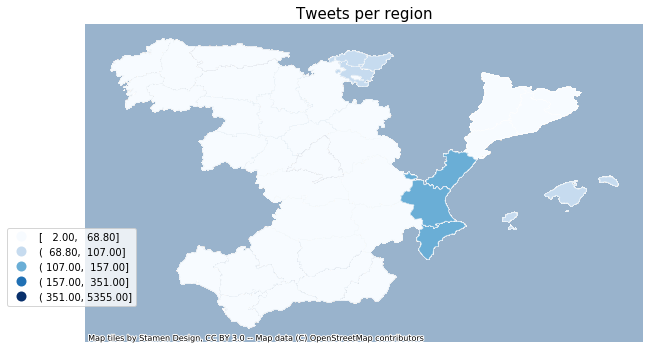

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))
regions_account.plot(ax=ax,
                      column='count',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Blues',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Tweets per region', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
ctx.add_basemap(ax)
#remove axes
ax.set_axis_off()

## Polarity Index and Sentiments

In [57]:
sentiment_emotions = joined.groupby(['NAME_1','day']).mean().reset_index()
sentiment_emotions

NAME_1         day     Unnamed: 0      tweet_id  \
0                  andalucia  2019-12-01  540192.093373  1.201158e+18   
1                  andalucia  2019-12-02  517792.523973  1.201522e+18   
2                  andalucia  2019-12-03  427478.274834  1.201882e+18   
3                  andalucia  2019-12-04  493170.947541  1.202238e+18   
4                  andalucia  2019-12-05  478646.541254  1.202609e+18   
...                      ...         ...            ...           ...   
2489  principado de asturias  2020-08-02  278417.929577  1.289940e+18   
2490  principado de asturias  2020-08-03  288614.763713  1.290291e+18   
2491  principado de asturias  2020-08-04  310666.920388  1.290663e+18   
2492  principado de asturias  2020-08-05  175550.312500  1.291007e+18   
2493  principado de asturias  2020-08-06   20718.500000  1.291175e+18   

           user_id       retweet  wordcount_text  nb_Pasado  cat_Pasado  \
0     3.489409e+17  1.200891e+18       15.539157   0.183735    0.011500   
1     3.769385e+17  1.201207e+18       15.075342   0.205479    0.010823   
2     3.678231e+17  1.201605e+18       15.086093   0.178808    0.011080   
3     4.249504e+17  1.200481e+18       14.514754   0.154098    0.010169   
4     3.635573e+17  1.201489e+18       14.376238   0.181518    0.009105   
...            ...           ...             ...        ...         ...   
2489  1.162580e+17  1.289442e+18       14.551308   0.197183    0.008733   
2490  1.187718e+17  1.290123e+18       13.561181   0.172996    0.009208   
2491  1.055342e+17  1.290472e+18       14.137864   0.184466    0.008494   
2492  3.735515e+16  1.290763e+18       14.257812   0.177083    0.006743   
2493  8.315887e+17           NaN        8.500000   0.000000    0.000000   

      nb_Present  cat_Present  nb_Futuro  cat_Futuro  nb_Negacio  cat_Negacio  \
0       1.469880     0.099335   0.048193    0.002921    0.298193     0.018838   
1       1.380137     0.092360   0.020548    0.001739    0.332192     0.018353   
2       1.447020     0.101586   0.029801    0.002427    0.251656     0.017838   
3       1.554098     0.119713   0.009836    0.001461    0.308197     0.025194   
4       1.287129     0.086441   0.009901    0.000953    0.267327     0.018811   
...          ...          ...        ...         ...         ...          ...   
2489    1.058350     0.056271   0.004024    0.000133    0.197183     0.013822   
2490    1.075949     0.059827   0.010549    0.000570    0.166667     0.011084   
2491    1.126214     0.060688   0.007767    0.000414    0.137864     0.007975   
2492    1.114583     0.047656   0.000000    0.000000    0.135417     0.006758   
2493    1.000000     0.141667   0.000000    0.000000    0.500000     0.041667   

      nb_Social  cat_Social  nb_Familia  cat_Familia  nb_Amigos  cat_Amigos  \
0      1.337349    0.084664    0.057229     0.004706   0.087349    0.007215   
1      1.318493    0.089077    0.044521     0.003173   0.041096    0.002264   
2      1.201987    0.077519    0.062914     0.003836   0.046358    0.002382   
3      1.255738    0.091407    0.085246     0.005412   0.026230    0.003643   
4      1.231023    0.080988    0.066007     0.005958   0.066007    0.004870   
...         ...         ...         ...          ...        ...         ...   
2489   0.947686    0.052652    0.044266     0.002565   0.040241    0.002057   
2490   0.943038    0.055519    0.033755     0.002195   0.031646    0.001469   
2491   0.935922    0.058747    0.050485     0.003329   0.081553    0.004786   
2492   0.812500    0.036631    0.033854     0.002498   0.028646    0.001373   
2493   0.500000    0.041667    0.000000     0.000000   0.000000    0.000000   

      nb_Humanos  cat_Humanos  nb_Afect  cat_Afect  nb_EmoPos  cat_EmoPos  \
0       0.102410     0.005774  0.804217   0.059435   0.466867    0.036107   
1       0.071918     0.006066  0.739726   0.054116   0.431507    0.035203   
2       0.132450     0.007726  0.685430   0.056033   0.377483    0.033007   
3       0.1344

In [58]:
### Merge the 'districts' and 'account_by_region' dataframes
sentiments = pd.merge(regions, sentiment_emotions, on='NAME_1')
sentiments1 = sentiments[(sentiments['day']>='2020-01-01') & (sentiments['day']<='2020-03-14')]
sentiments2 = sentiments[(sentiments['day']>='2020-03-14') & (sentiments['day']<='2020-05-11')]
sentiments3 = sentiments[(sentiments['day']>='2020-05-11') & (sentiments['day']<='2020-06-21')]
sentiments4 = sentiments[(sentiments['day']>='2020-06-21') & (sentiments['day']<='2020-08-05')]

In [59]:
print(sentiments1['day'].min())
print(sentiments1['day'].max())
print(sentiments2['day'].min())
print(sentiments2['day'].max())
print(sentiments3['day'].min())
print(sentiments3['day'].max())
print(sentiments4['day'].min())
print(sentiments4['day'].max())

2020-01-01
2020-03-14
2020-03-14
2020-05-11
2020-05-11
2020-06-21
2020-06-21
2020-08-05


## Polarity Index

In [60]:
import contextily as ctx

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



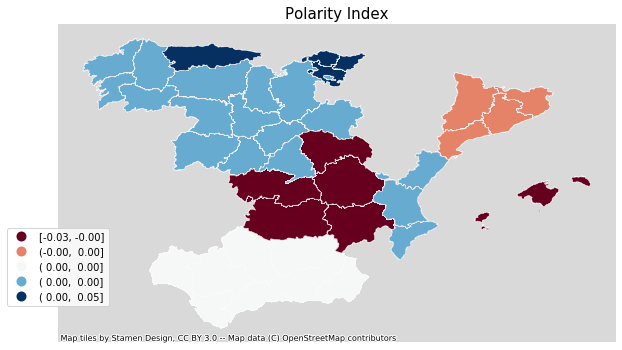

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments1.plot(ax=ax,
                      column='polarity',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='RdBu',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Polarity Index Before Covid-19', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



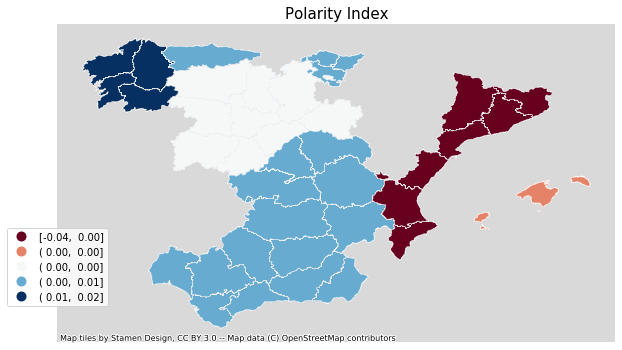

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments2.plot(ax=ax,
                      column='polarity',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='RdBu',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Polarity Index During Lock-down', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



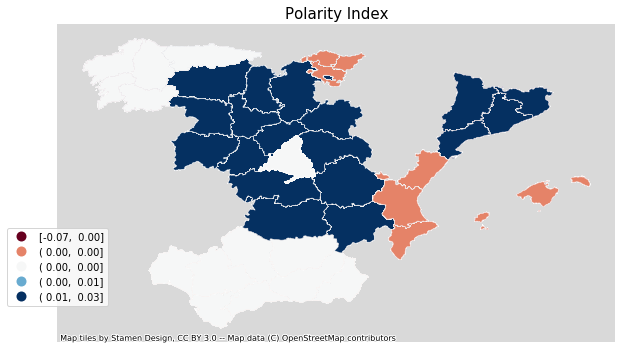

In [63]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments3.plot(ax=ax,
                      column='polarity',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='RdBu',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Polarity Index Deconfinement Plan', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



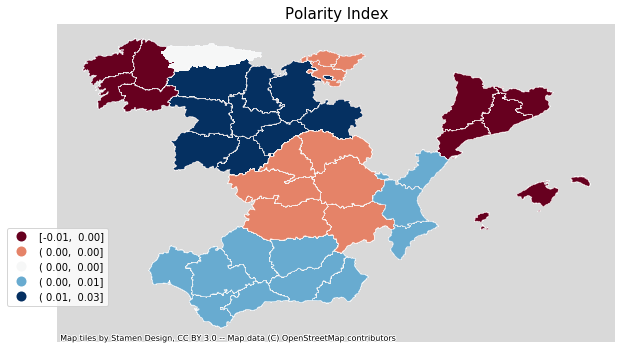

In [64]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments4.plot(ax=ax,
                      column='polarity',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='RdBu',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Polarity Index After The End of State of Emergency', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

## Sentiments

### Positivo

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



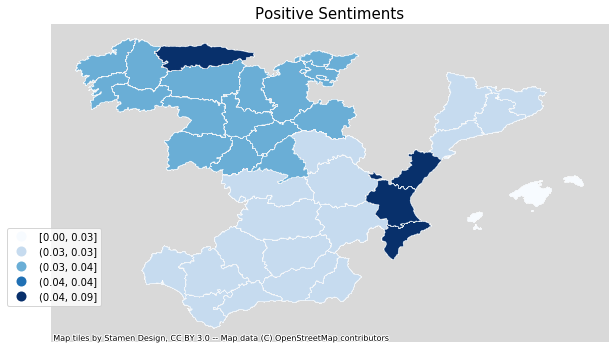

In [65]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments1.plot(ax=ax,
                      column='% Positivo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Blues',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Positive Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



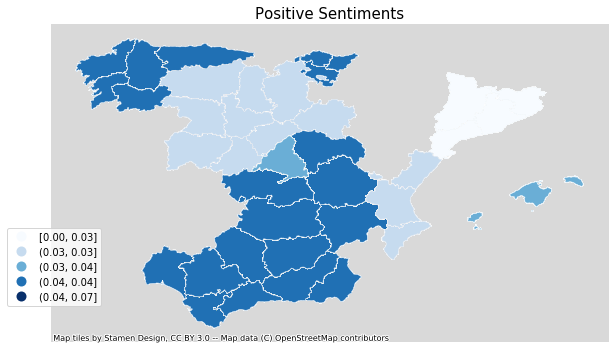

In [66]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments2.plot(ax=ax,
                      column='% Positivo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Blues',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Positive Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



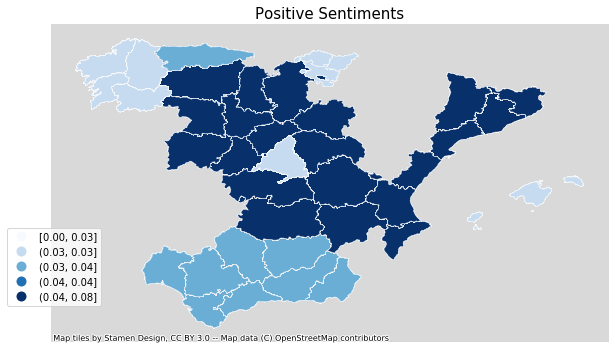

In [67]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments3.plot(ax=ax,
                      column='% Positivo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Blues',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Positive Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



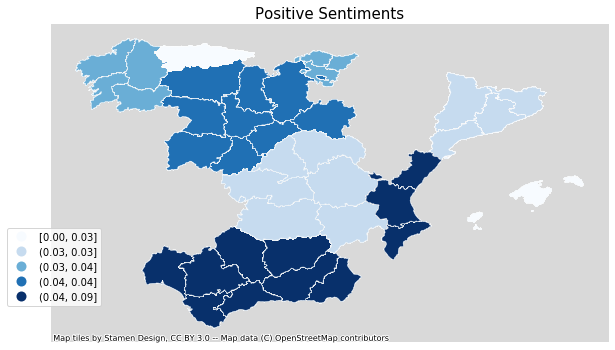

In [68]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments4.plot(ax=ax,
                      column='% Positivo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Blues',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Positive Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

### Negative

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



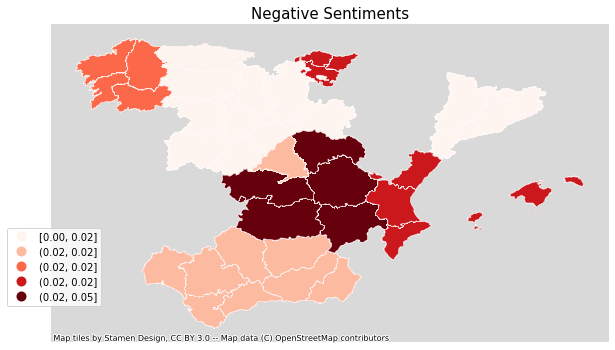

In [69]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments1.plot(ax=ax,
                      column='% Negativo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Negative Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



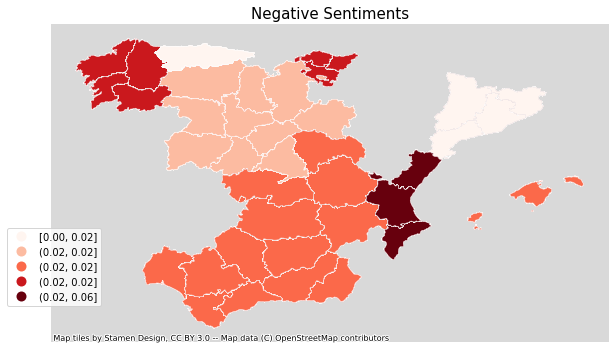

In [70]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments2.plot(ax=ax,
                      column='% Negativo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Negative Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



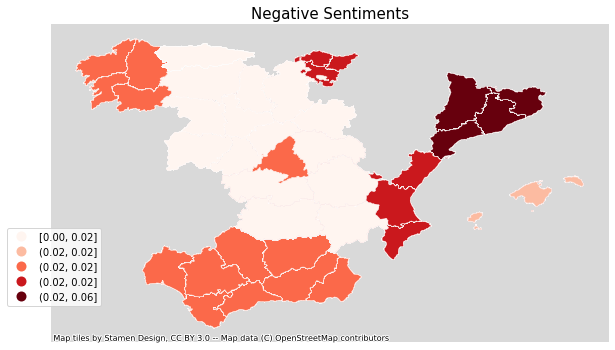

In [71]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments4.plot(ax=ax,
                      column='% Negativo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Negative Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



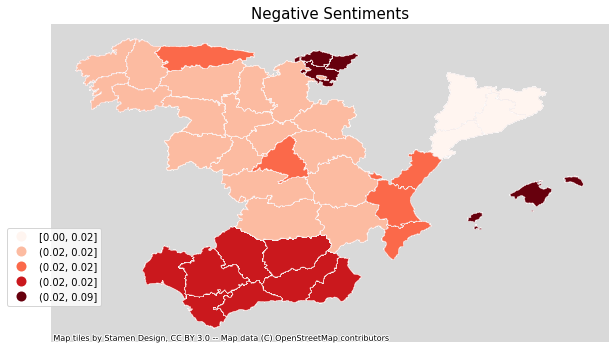

In [72]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments3.plot(ax=ax,
                      column='% Negativo',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Negative Sentiments', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

## Emotions

### Anxiety

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



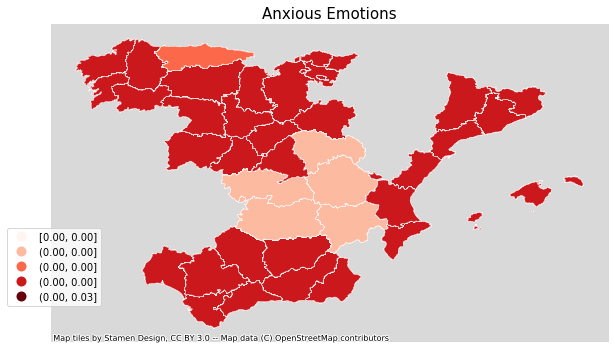

In [73]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments1.plot(ax=ax,
                      column='% Ansiedad',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Anxious Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



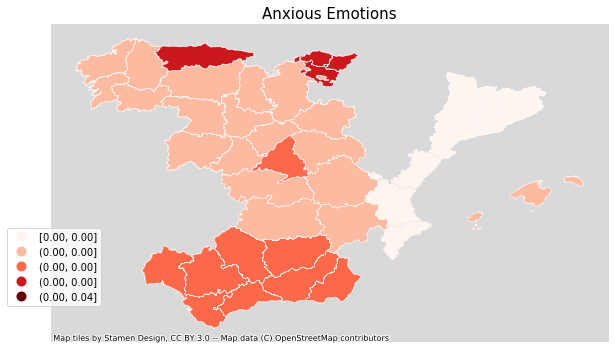

In [74]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments2.plot(ax=ax,
                      column='% Ansiedad',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Anxious Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



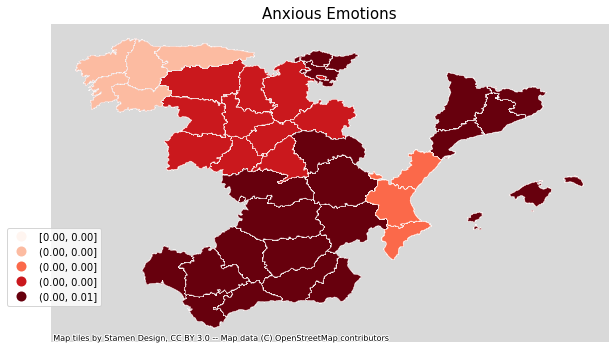

In [75]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments3.plot(ax=ax,
                      column='% Ansiedad',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Anxious Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



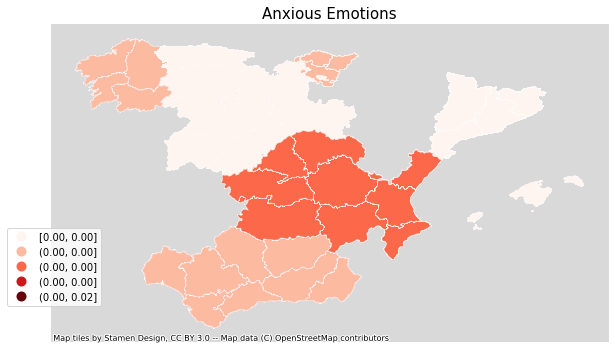

In [76]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments4.plot(ax=ax,
                      column='% Ansiedad',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Anxious Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

### Anger

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



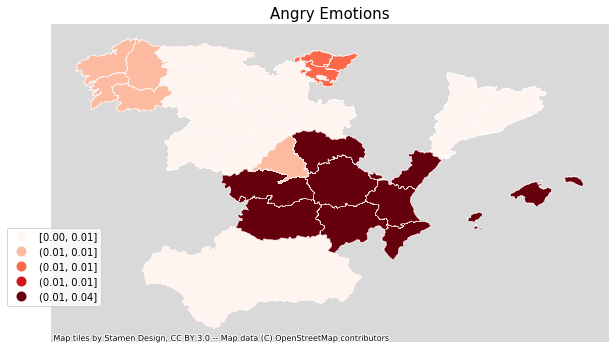

In [77]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments1.plot(ax=ax,
                      column='% Enfado',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Angry Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



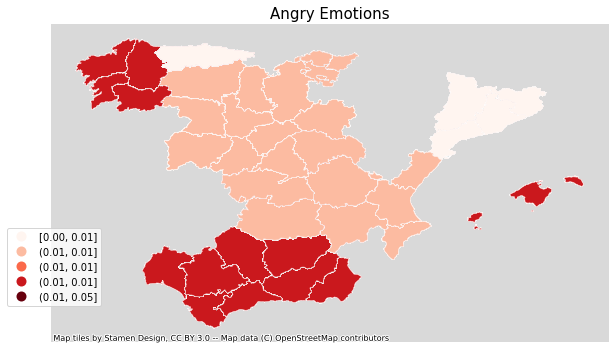

In [78]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments2.plot(ax=ax,
                      column='% Enfado',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Angry Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



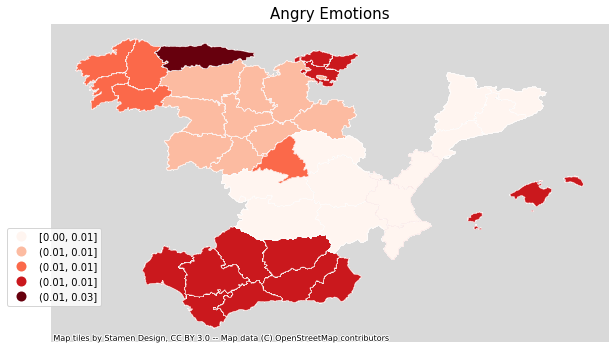

In [79]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments3.plot(ax=ax,
                      column='% Enfado',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Angry Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



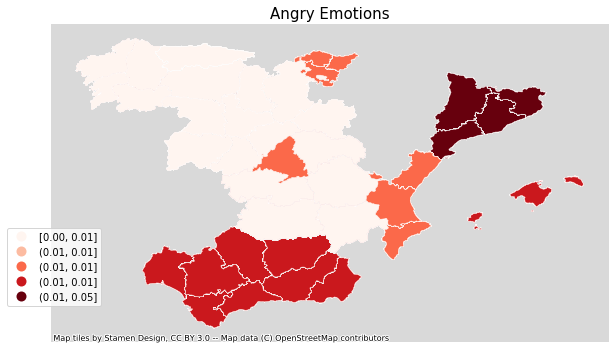

In [80]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments4.plot(ax=ax,
                      column='% Enfado',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Angry Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

### Sadness

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



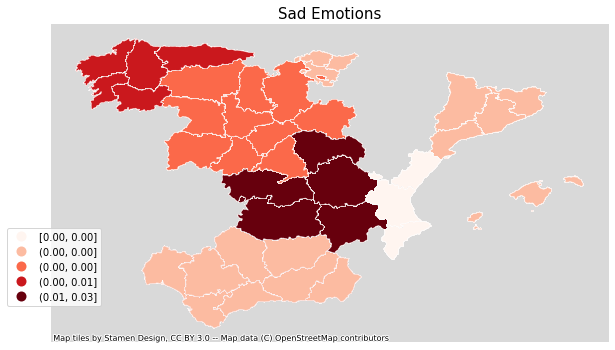

In [81]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments1.plot(ax=ax,
                      column='% Triste',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Sad Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



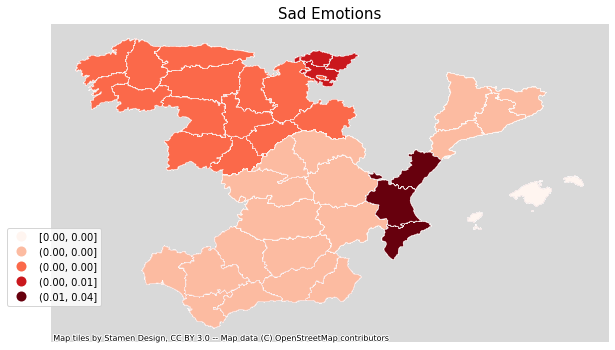

In [82]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments2.plot(ax=ax,
                      column='% Triste',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Sad Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



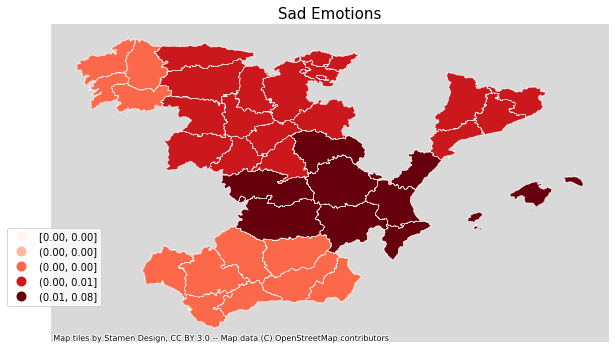

In [83]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments3.plot(ax=ax,
                      column='% Triste',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Sad Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

The "url" option is deprecated. Please use the "source" argument instead.

/Users/juanporras/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning:

The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).



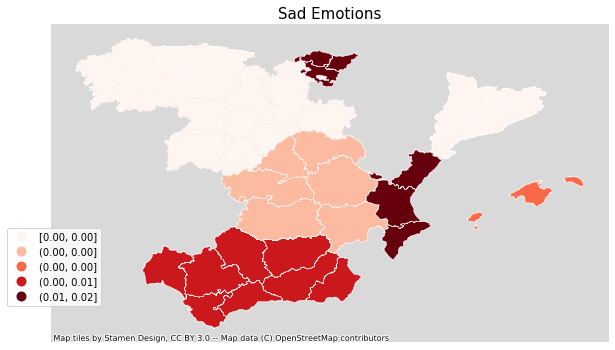

In [84]:
fig, ax = plt.subplots(figsize=(10, 7))
sentiments4.plot(ax=ax,
                      column='% Triste',
                      legend=True,
                      legend_kwds={'loc': 'lower right'},
                      cmap='Reds',
                      figsize=(25,15),
                      scheme='quantiles',
                      k=5,
                      linewidth=0.5,
                      edgecolor='1',
                      markersize=1)
#fig.legend(loc='lower center')
#add title to the map
ax.set_title('Sad Emotions', fontdict= 
            {'fontsize':15})
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.10,.10))
ax.get_figure()
#background
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
#remove axes
ax.set_axis_off()